In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import time
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from yellowbrick.model_selection import FeatureImportances
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection



In [50]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
columns = ["Class","id","Sequence"] # Naming the columns
genes = pd.read_csv(url, names = columns) # Reading the data

print(genes.shape)

(106, 3)


In [51]:
genes.nunique() # promoter as "+" and "-" as Non promoter 

Class         2
id          106
Sequence    106
dtype: int64

In [52]:
genes

Class         id                                           Sequence
0       +        S10  \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1       +       AMPC  \t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2       +       AROH  \t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3       +      DEOP2  \taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4       +  LEU1_TRNA  \ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
..    ...        ...                                                ...
101     -        799  \t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102     -        987  \t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103     -       1226  \t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104     -        794  \t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...
105     -       1442  \t\ttaacattaataaataaggaggctctaatggcactcattagcc...

[106 rows x 3 columns]

In [77]:
for index, row in genes.iterrows():
    genes["Sequence"][index] = row["Sequence"].replace("\t", "")
    print(row["Sequence"])
    print(len(row["Sequence"]))

tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt
57
tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa
57
gtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg
57
aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc
57
tcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag
57
aggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt
57
cagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat
57
tttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca
57
cgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt
57
ttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca
57
gcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg
57
cctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac
57
gatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga
57
ctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca
57
tttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca
57
aagcaaagaaatgcttgactctgtagcgggaaggcgtattatgcacaccgccgcgcc
57
atgcatttttccgcttgtcttcct

In [80]:
seq = pd.DataFrame(np.random.randn(106,57))

print(seq)

           0         1         2         3         4         5         6   \
0   -0.436797  0.276850 -0.145316 -0.718854  0.040390 -1.367957  0.053513   
1   -0.446168  1.383177  0.463133  0.476791 -0.284567  0.523187 -0.771533   
2    0.827905 -0.368223 -1.169816 -1.946693 -0.733681  0.713765  0.457893   
3    1.116038  0.873375  0.779505 -1.060406 -1.027946 -1.583351 -0.942147   
4   -1.543975  0.159443 -0.149604  0.713925  0.837635 -0.699879 -0.286580   
..        ...       ...       ...       ...       ...       ...       ...   
101  0.259951  0.304481 -0.691011  0.450833 -1.230658  1.398863 -0.872427   
102  1.586637  0.404292 -0.404121  0.873103 -1.199129  0.733035  0.207249   
103  1.031782 -0.540282  0.444007  0.564470 -0.934556  0.668471  1.237056   
104  0.399468  1.270248  0.635773 -0.846059  0.377266 -0.876887  1.337656   
105  0.110199 -0.129231 -0.403259  0.044983  0.248028 -0.562343 -0.436738   

           7         8         9   ...        47        48        49  \
0  

In [82]:
for index, row in genes.iterrows():
    seq.loc[index] = list(row["Sequence"])

seq["Class"] = genes["Class"]


    

In [83]:
seq

0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0    t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1    t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2    g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3    a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4    t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..   ...
101  c  c  t  c  a  a  t  g  g  c  ...  g  a  a  c  t  a  t  a  t     -
102  g  t  a  t  t  c  t  c  a  a  ...  t  c  a  a  c  a  t  t  g     -
103  c  g  c  g  a  c  t  a  c  g  ...  a  a  g  g  c  t  t  c  c     -
104  c  t  c  g  t  c  c  t  c  a  ...  a  g  g  a  g  g  a  a  c     -
105  t  a  a  c  a  t  t  a  a  t  ...  t  c  a  a  g  a  a  c  t     -

[106 rows x 58 columns]

<AxesSubplot:xlabel='Class', ylabel='count'>

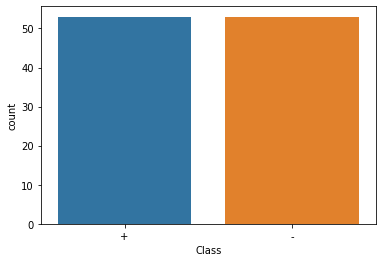

In [85]:
sns.countplot(seq["Class"])

In [88]:
num_seq = pd.get_dummies(seq)

In [89]:
num_seq

0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  55_a  55_c  55_g  \
0      0    0    0    1    1    0    0    0    0    1  ...     0     0     1   
1      0    0    0    1    0    0    1    0    0    1  ...     1     0     0   
2      0    0    1    0    0    0    0    1    1    0  ...     0     1     0   
3      1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4      0    0    0    1    0    1    0    0    0    0  ...     1     0     0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
101    0    1    0    0    0    1    0    0    0    0  ...     1     0     0   
102    0    0    1    0    0    0    0    1    1    0  ...     0     0     0   
103    0    1    0    0    0    0    1    0    0    1  ...     0     1     0   
104    0    1    0    0    0    0    0    1    0    1  ...     1     0     0   
105    0    0    0    1    1    0    0    0    1    0  ...     0     1     0   

     55_t  56_a  56_c  56_g  56_t  Class_+  Class_-  
0       0     0     0     0     1        1        0  
1       0     1     0     0     0        1        0  
2       0     0     0     1     0        1        0  
3       1     0     1     0     0        1        0  
4       0     0     0     1     0        1        0  
..    ...   ...   ...   ...   ...      ...      ...  
101     0     0     0     0     1        0        1  
102     1     0     0     1     0        0        1  
103     0     0     1     0     0        0        1  
104     0     0     1     0     0        0        1  
105     0     0     0     0     1        0        1  

[106 rows x 230 columns]

In [90]:
num_seq.drop("Class_-", axis = 1, inplace = True)
num_seq.rename(columns = {"Class_+" : "Class"}, inplace = True)

num_seq

0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0      0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1      0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2      0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3      1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4      0    0    0    1    0    1    0    0    0    0  ...     1     1     0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
101    0    1    0    0    0    1    0    0    0    0  ...     1     1     0   
102    0    0    1    0    0    0    0    1    1    0  ...     1     0     0   
103    0    1    0    0    0    0    1    0    0    1  ...     1     0     1   
104    0    1    0    0    0    0    0    1    0    1  ...     0     1     0   
105    0    0    0    1    1    0    0    0    1    0  ...     0     0     1   

     55_g  55_t  56_a  56_c  56_g  56_t  Class  
0       1     0     0     0     0     1      1  
1       0     0     1     0     0     0      1  
2       0     0     0     0     1     0      1  
3       0     1     0     1     0     0      1  
4       0     0     0     0     1     0      1  
..    ...   ...   ...   ...   ...   ...    ...  
101     0     0     0     0     0     1      0  
102     0     1     0     0     1     0      0  
103     0     0     0     1     0     0      0  
104     0     0     0     1     0     0      0  
105     0     0     0     0     0     1      0  

[106 rows x 229 columns]

In [96]:
seq

0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0    t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1    t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2    g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3    a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4    t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..   ...
101  c  c  t  c  a  a  t  g  g  c  ...  g  a  a  c  t  a  t  a  t     -
102  g  t  a  t  t  c  t  c  a  a  ...  t  c  a  a  c  a  t  t  g     -
103  c  g  c  g  a  c  t  a  c  g  ...  a  a  g  g  c  t  t  c  c     -
104  c  t  c  g  t  c  c  t  c  a  ...  a  g  g  a  g  g  a  a  c     -
105  t  a  a  c  a  t  t  a  a  t  ...  t  c  a  a  g  a  a  c  t     -

[106 rows x 58 columns]

In [111]:

nucleotide_sequence = seq

# Initialize the dataframe 'numerical_nucleotide' of shape (106,(57*4))

numerical_nucleotide = pd.DataFrame(np.random.randn(106,(57*4)))

print(numerical_nucleotide.shape)

# Define the dictionary 'key1'
key1 = {'a' : '1000','c' : '0100','g' : '0010','t' : '0001'}

# Assign values to 'numerical_nucleotide'

for i in range(nucleotide_sequence.shape[0]):
      temp1 = '' 
      for j in range(nucleotide_sequence.shape[1]-1):
        temp1 = temp1 + key1[nucleotide_sequence[j][i]]
      temp2 = [int(x) for x in list(temp1)]
      numerical_nucleotide.iloc[i] = temp2

# Assign 'Class' column to 'numerical_nucleotide'

numerical_nucleotide['Class'] = nucleotide_sequence['Class']

# Replace '+' and '-' of 'Class' column with values 1 and 0 respectively

numerical_nucleotide.replace(to_replace = '+',value = 1,inplace = True)
numerical_nucleotide.replace(to_replace = '-',value = 0,inplace = True)

print(numerical_nucleotide)

(106, 228)
       0    1    2    3    4    5    6    7    8    9  ...  219  220  221  \
0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  1.0   
3    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
101  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
102  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0   
103  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.0  1.0   
104  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  0.0   
105  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   

     222  223  224  225  226  227  Class  
0    1.0  0.0  0.0  0

In [114]:
num_seq

0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0      0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1      0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2      0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3      1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4      0    0    0    1    0    1    0    0    0    0  ...     1     1     0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
101    0    1    0    0    0    1    0    0    0    0  ...     1     1     0   
102    0    0    1    0    0    0    0    1    1    0  ...     1     0     0   
103    0    1    0    0    0    0    1    0    0    1  ...     1     0     1   
104    0    1    0    0    0    0    0    1    0    1  ...     0     1     0   
105    0    0    0    1    1    0    0    0    1    0  ...     0     0     1   

     55_g  55_t  56_a  56_c  56_g  56_t  Class  
0       1     0     0     0     0     1      1  
1       0     0     1     0     0     0      1  
2       0     0     0     0     1     0      1  
3       0     1     0     1     0     0      1  
4       0     0     0     0     1     0      1  
..    ...   ...   ...   ...   ...   ...    ...  
101     0     0     0     0     0     1      0  
102     0     1     0     0     1     0      0  
103     0     0     0     1     0     0      0  
104     0     0     0     1     0     0      0  
105     0     0     0     0     0     1      0  

[106 rows x 229 columns]

In [115]:
X = num_seq.drop("Class", axis=1)
y = num_seq["Class"]

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [121]:
validation_type = model_selection.KFold(n_splits = 10)

In [122]:
knn = KNeighborsClassifier(n_neighbors = 3)

cv_result = model_selection.cross_val_score(knn, X_train, y_train, cv = validation_type, scoring="accuracy")

In [123]:
cv_result.mean()

array([0.875     , 0.5       , 0.875     , 1.        , 1.        ,
       0.625     , 1.        , 0.875     , 0.75      , 0.85714286])